# 垃圾邮件文本分类(tensorflow)

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [4]:
def load_data(file_path):
    data=[]
    label=[]
    with open(file_path,"r") as data_file:
        raw_data=data_file.readlines()
        for raw_line in raw_data:
            sample=raw_line[:-1]#删除了行读取数据中的\n
            sample=sample.split(",")#以逗号分隔字符串
            label.append(sample[-1])#记录末尾的布尔值
            sample=np.array([float(feature) for feature in sample[:-1]])
            sample[-3]/=10
            sample[-2]/=100
            sample[-1]/=1000
            data.append(sample)#导出sample的值
    return np.array(data),np.array(label)
train_data,train_label=load_data("./train.data")
test_data,test_label=load_data("./test.data")

In [5]:
#序贯模型
from tensorflow.keras import layers
model = tf.keras.Sequential([
layers.Dense(57, activation='softmax'),
layers.Dense(1, activation='sigmoid')])

In [6]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(train_data,#训练数据
                    train_label,#训练标识，有监督学习
                    epochs=40,#训练轮数
                    batch_size=20,
                    validation_data=(test_data, test_label),
                    verbose=1)

Train on 3224 samples, validate on 1377 samples
Epoch 1/40
3224/3224 [==============================] - 0s 148us/step - loss: 0.6598 - acc: 0.7395 - val_loss: 0.6190 - val_acc: 0.8155
Epoch 2/40
3224/3224 [==============================] - 0s 49us/step - loss: 0.5775 - acc: 0.8533 - val_loss: 0.5210 - val_acc: 0.8962
Epoch 3/40
3224/3224 [==============================] - 0s 50us/step - loss: 0.4888 - acc: 0.9004 - val_loss: 0.4403 - val_acc: 0.9070
Epoch 4/40
3224/3224 [==============================] - 0s 50us/step - loss: 0.4240 - acc: 0.9079 - val_loss: 0.3845 - val_acc: 0.9216
Epoch 5/40
3224/3224 [==============================] - 0s 49us/step - loss: 0.3765 - acc: 0.9181 - val_loss: 0.3423 - val_acc: 0.9274
Epoch 6/40
3224/3224 [==============================] - 0s 50us/step - loss: 0.3402 - acc: 0.9246 - val_loss: 0.3101 - val_acc: 0.9310
Epoch 7/40
3224/3224 [==============================] - 0s 50us/step - loss: 0.3119 - acc: 0.9287 - val_loss: 0.2858 - val_acc: 0.9332
Epoch 

In [8]:
history_dict = history.history
history_dict.keys()
dict_keys=['loss', 'val_loss', 'val_acc', 'acc']

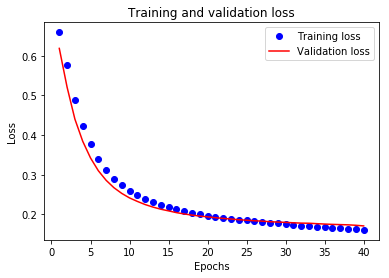

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

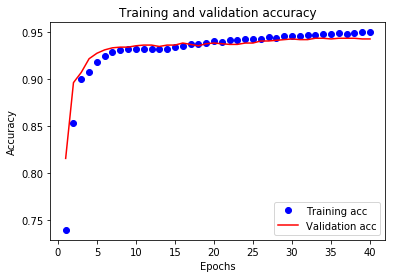

In [10]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [11]:
#57个数据，没有最后一个布尔值
def load_data(file_path):
    data=[]
    label=[]
    with open(file_path,"r") as data_file:
        raw_data=data_file.readlines()
        for raw_line in raw_data:
            sample=raw_line[:-1]
            sample=sample.split(",")
            sample=np.array( [float(feature) for feature in sample] )
            sample[-3]/=10
            sample[-2]/=100
            sample[-1]/=1000
            data.append(sample)
    return np.array(data)
flag_data=load_data("./get_the_flag.data")

In [12]:
flag=model.predict_classes(flag_data,batch_size=20,verbose=1)

560/560 [==============================] - 0s 53us/step


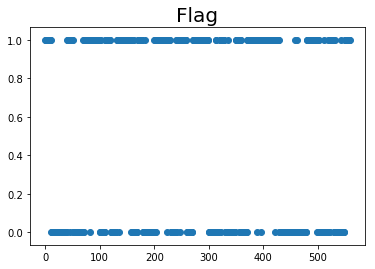

In [25]:
#flag 图
import matplotlib.pyplot as plt
import numpy as np
x = np.array(range(560))
y = flag
# 设置图表标题并
plt.title('Flag', fontsize=20)
plt.scatter(x, y)
plt.show()

In [30]:
mark=0
for i in range(560):
    if i==0 :
        continue
    if flag[i]==1 :
        mark+=1
    if i%10==0 :
        if mark>=5 :
            print(1,' ',end="")
        else :
            print(0,' ',end="")
        mark=0
        
        

1  0  0  0  1  0  0  1  1  1  0  1  0  1  1  1  0  1  0  0  1  1  1  0  1  1  0  1  1  1  0  0  1  0  0  1  0  1  1  1  1  1  1  0  0  0  0  0  1  1  0  0  1  0  0  

## Flag：1  0  0  0  1  0  0  1  1  1  0  1  0  1  1  1  0  1  0  0  1  1  1  0  1  1  0  1  1  1  0  0  1  0  0  1  0  1  1  1  1  1  1  0  0  0  0  0  1  1  0  0  1  0  0  
